## Support Vector Regressor Implementation

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
x,y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

In [4]:
x

array([[-0.29287945, -0.18015937],
       [-1.29928625, -1.62404558],
       [-0.11298283,  0.00789562],
       ...,
       [-0.84460051, -0.96096903],
       [-0.44149579, -1.85828552],
       [-0.34982727, -1.76842399]])

In [5]:
y

array([-2.71445920e+01, -1.75931959e+02, -3.64435107e+00, -9.84108242e+00,
       -1.71191229e+01, -6.83155753e+01,  4.29949446e+01,  5.83785161e+01,
       -4.30079880e+01, -1.93430005e+02,  4.28370339e+01,  1.02295695e+02,
        4.36981199e+01, -2.22789605e+01, -5.00649896e+01,  2.82927676e+01,
       -1.43312270e+02, -3.13975121e+01, -2.15057146e+02,  1.34057025e+02,
       -2.38841803e+02,  1.81739352e+01,  1.02806657e+02,  1.00614563e+02,
       -1.48143823e+02, -1.31962191e+02,  2.44998099e+01, -6.00833739e+01,
       -2.07536004e+00,  9.99810162e+00,  2.00825278e+01,  1.81578070e+02,
       -4.08257254e+01,  1.94916391e+00,  1.29696767e+02,  1.74236960e+02,
        5.75379064e+01, -1.31658000e+02, -1.03134482e+02, -1.41910443e+02,
        8.78212040e+01,  1.63421689e+01, -9.16772311e+01,  7.03687341e+00,
        1.79542802e+01,  6.09697524e+01, -1.72340281e+02, -1.13992160e+02,
       -4.08971518e+01, -7.44738519e+01, -5.50223306e+01, -7.25817026e+01,
       -1.45218548e+01, -

In [6]:
pd.DataFrame(x)[0]

0     -0.292879
1     -1.299286
2     -0.112983
3     -0.211644
4     -0.673242
         ...   
995    1.134718
996    0.541582
997   -0.844601
998   -0.441496
999   -0.349827
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

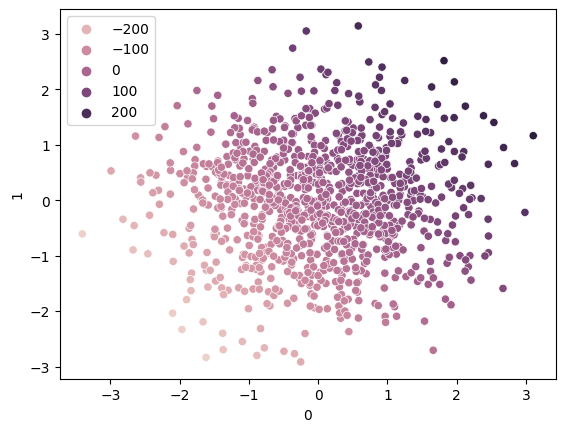

In [9]:
sns.scatterplot(x=pd.DataFrame(x)[0], y=pd.DataFrame(x)[1], hue=y)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=10)

In [11]:
from sklearn.svm import SVR

In [12]:
svr = SVR(kernel='linear')

In [13]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [14]:
svr.coef_

array([[66.00029776, 55.67529485]])

In [15]:
## prediction
y_pred = svr.predict(x_test)

In [16]:
y_pred

array([ 100.55456498,    5.97369852,  132.72822559,  -28.08035396,
        -66.48271746,   81.85137798,  -67.70078376,  128.45655083,
        105.94811138,   -4.26372077,    9.31323077,  -45.04477546,
         10.5389793 ,  -11.91947409, -199.49616979,  108.85160979,
       -173.70181474,  -72.00007255,   23.93352432,  -52.38107565,
        180.52753795,  -29.89971877,   93.19637647,   45.16673738,
        -65.038111  , -142.09614134, -158.28362051,   20.5885593 ,
         33.13773549,  -98.48197475,  -21.69189705, -134.70499853,
       -111.00650279,  147.28155371, -103.3500983 ,  -15.33576199,
         71.00025054,  -22.419695  ,  -97.08993116, -199.41137404,
        -21.59400859,   42.99112118,   31.6949086 ,  138.44840788,
        -26.92035289,   -7.37751792,  -32.67244031,  -72.39917583,
       -127.50358389,  -41.97473944,  -59.41558093,  -45.20364638,
        -46.18465815,  -30.1832229 ,  -40.0534298 ,   84.80790484,
       -135.45662927, -100.08764652,  158.54273961,  103.09801

In [17]:
from sklearn.metrics import r2_score

In [19]:
print(r2_score(y_test,y_pred))

0.999083305174652


## Hyperparametere Tuning With SVR

In [20]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [21]:
grid = GridSearchCV(SVR(), param_grid=param_grid, refit=True, cv=5, verbose=3)

In [22]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.791 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.789 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.794 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.788 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.820 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.791 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.789 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.794 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.788 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.820 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [23]:
grid.best_params_

{'C': 100, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [25]:
## prediction
y_pred1 = grid.predict(x_test)
print(r2_score(y_test,y_pred1))

0.999100538118705
